# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [3]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [5]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [31]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [69]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")

# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

print("True News Sample:")
print(true_df.head())

print("\nFake News Sample:")
print(fake_df.head())

True News Sample:
                      title                      text                date
0  As U.S. budget fight ...  WASHINGTON (Reuters) ...  December 31, 2017 
1  U.S. military to acce...  WASHINGTON (Reuters) ...  December 29, 2017 
2  Senior U.S. Republica...  WASHINGTON (Reuters) ...  December 31, 2017 
3  FBI Russia probe help...  WASHINGTON (Reuters) ...  December 30, 2017 
4  Trump wants Postal Se...  SEATTLE/WASHINGTON (R...  December 29, 2017 

Fake News Sample:
                      title                      text               date
0   Donald Trump Sends O...  Donald Trump just cou...  December 31, 2017
1   Drunk Bragging Trump...  House Intelligence Co...  December 31, 2017
2   Sheriff David Clarke...  On Friday, it was rev...  December 30, 2017
3   Trump Is So Obsessed...  On Christmas day, Don...  December 29, 2017
4   Pope Francis Just Ca...  Pope Francis used his...  December 25, 2017


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [35]:
# Inspect the DataFrame with True News to understand the given data
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [37]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [39]:
# Print the column details for True News DataFrame
true_df.describe(include='all')

,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills ...,(Reuters) - Highlight...,"December 20, 2017"
freq,14,8,182


In [41]:
# Print the column details for Fake News Dataframe
fake_df.describe(include='all')

,title,text,date
count,23502,23502,23481
unique,17914,17466,1692
top,MEDIA IGNORES Time Th...,,"May 10, 2017"
freq,6,626,46


In [43]:
# Print the column names of both DataFrames
print(f"True DataFrames coloumn name ->{true_df.columns}")
print(f"Fake DataFrames coloumn name ->{fake_df.columns}")

True DataFrames coloumn name ->Index(['title', 'text', 'date'], dtype='object')
Fake DataFrames coloumn name ->Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [71]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [73]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_df,fake_df],ignore_index=True)

In [49]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

,title,text,date,news_label
0,As U.S. budget fight ...,WASHINGTON (Reuters) ...,"December 31, 2017",1
1,U.S. military to acce...,WASHINGTON (Reuters) ...,"December 29, 2017",1
2,Senior U.S. Republica...,WASHINGTON (Reuters) ...,"December 31, 2017",1
3,FBI Russia probe help...,WASHINGTON (Reuters) ...,"December 30, 2017",1
4,Trump wants Postal Se...,SEATTLE/WASHINGTON (R...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [75]:
# Check Presence of Null Values
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [77]:
# Handle Rows with Null Values
df = df.dropna()

# Re Check Presence of Null Values
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [79]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title']+' '+ df['text']+' '+ df['date']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop(columns=['title', 'text', 'date'], inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
df.head()

,news_label,news_text
0,1,As U.S. budget fight ...
1,1,U.S. military to acce...
2,1,Senior U.S. Republica...
3,1,FBI Russia probe help...
4,1,Trump wants Postal Se...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [128]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(columns=['clean_text', 'lemmatized_text'])
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df['news_label']
# Check the new df 
df_clean.head()

,clean_text,lemmatized_text,news_label
0,NaN,NaN,1
1,NaN,NaN,1
2,NaN,NaN,1
3,NaN,NaN,1
4,NaN,NaN,1


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [130]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)    
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [132]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text'] = df['news_text'].apply(clean_text)
df_clean.head()

,clean_text,lemmatized_text,news_label
0,as us budget fight lo...,NaN,1
1,us military to accept...,NaN,1
2,senior us republican ...,NaN,1
3,fbi russia probe help...,NaN,1
4,trump wants postal se...,NaN,1


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [135]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

# Download necessary data (run once)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words("english")) 
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(document):
    # change sentence to lower case
    document = document.lower()
    
    # tokenize into words
    tokens = word_tokenize(document)
    tagged_tokens = pos_tag(tokens)

    # remove stop words and and keep only NN and NNS tags
    words = [word for word,tag in tagged_tokens
             if word not in stop_words and tag in ('NN', 'NNS') ]
    
    # Lemmatize as nouns
    words = [wordnet_lemmatizer.lemmatize(word, pos='n') for word in words]

    # join words to make sentence
    documents =  " ".join(words)
    return documents

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/susmitamishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/susmitamishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/susmitamishra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [137]:
# Testing of preprocess function 
sample = "The Dogs are running around playgrounds with boys."
print(preprocess(sample))

dog boy


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [139]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['clean_text'].apply(preprocess)

### Save the Cleaned data as a csv file (Recommended)

In [141]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [143]:
# Check the first few rows of the DataFrame
df_clean.head()

,clean_text,lemmatized_text,news_label
0,as us budget fight lo...,budget fight republic...,1
1,us military to accept...,transgender recruit m...,1
2,senior us republican ...,senator job washingto...,1
3,fbi russia probe help...,fbi russia probe dipl...,1
4,trump wants postal se...,trump service amazon ...,1


In [145]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [147]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clean_text       44889 non-null  object
 1   lemmatized_text  44889 non-null  object
 2   news_label       44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [149]:
df_clean.isnull().sum()

clean_text         9
lemmatized_text    9
news_label         0
dtype: int64

In [151]:
df_clean=df_clean.dropna()
df_clean.isnull().sum()

clean_text         0
lemmatized_text    0
news_label         0
dtype: int64

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [155]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)
print(train_df.shape, val_df.shape)

(31422, 3) (13467, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [157]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_length'] = train_df['clean_text'].apply(lambda x: len(str(x)))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_length'] = train_df['lemmatized_text'].apply(lambda x: len(str(x)))

In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31422 entries, 34354 to 15795
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clean_text              31422 non-null  object
 1   lemmatized_text         31422 non-null  object
 2   news_label              31422 non-null  int64 
 3   cleaned_text_length     31422 non-null  int64 
 4   lemmatized_text_length  31422 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [161]:
train_df.head()

,clean_text,lemmatized_text,news_label,cleaned_text_length,lemmatized_text_length
34354,hollywoods slick proh...,hollywood ad trump re...,0,233,94
29955,grand jury indicts an...,jury indicts zealot p...,0,2535,893
44780,false flag florida fb...,flag florida fbi agen...,0,2078,708
41313,the truth about alici...,truth machado upbackf...,0,199,101
16801,factbox how will spai...,factbox government co...,1,2699,998


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

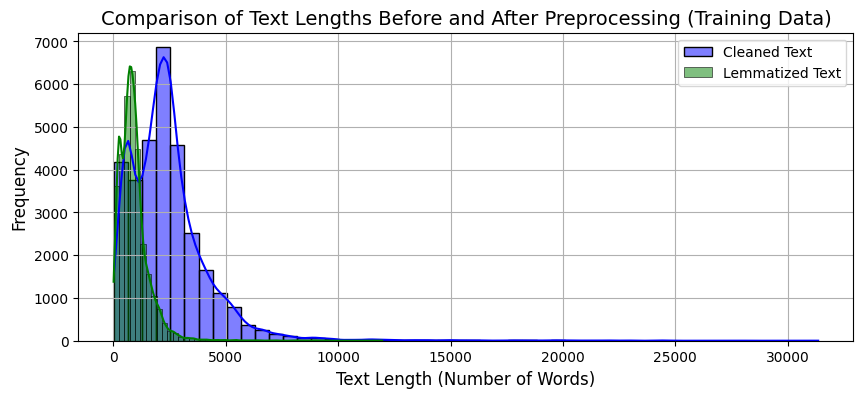

In [271]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,4))

# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_text_length'], color='blue', label='Cleaned Text', kde=True, bins=50, alpha=0.5)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['lemmatized_text_length'], color='green', label='Lemmatized Text', kde=True, bins=50, alpha=0.5)

# Add labels and legend
plt.title('Comparison of Text Lengths Before and After Preprocessing (Training Data)', fontsize=14)
plt.xlabel('Text Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

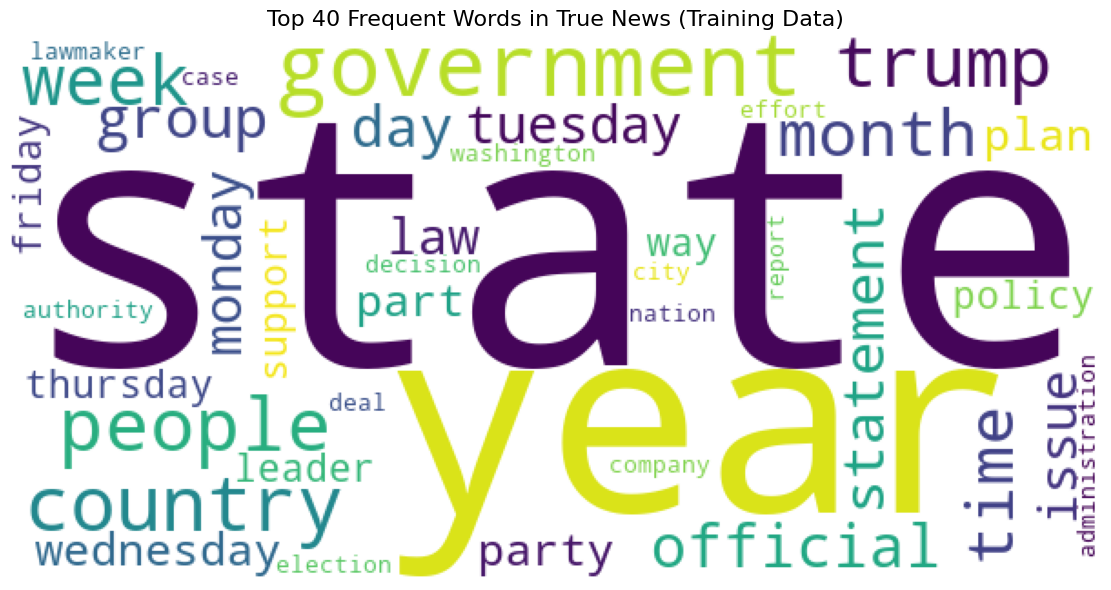

In [273]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = train_df[train_df['news_label'] == 1]
true_news_text = true_news['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News
wordcloud_true_news = WordCloud(width=600, height=300, max_words=40, background_color='white').generate(true_news_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_true_news)
plt.axis('off')
plt.title('Top 40 Frequent Words in True News (Training Data)', fontsize=16)
plt.tight_layout()
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

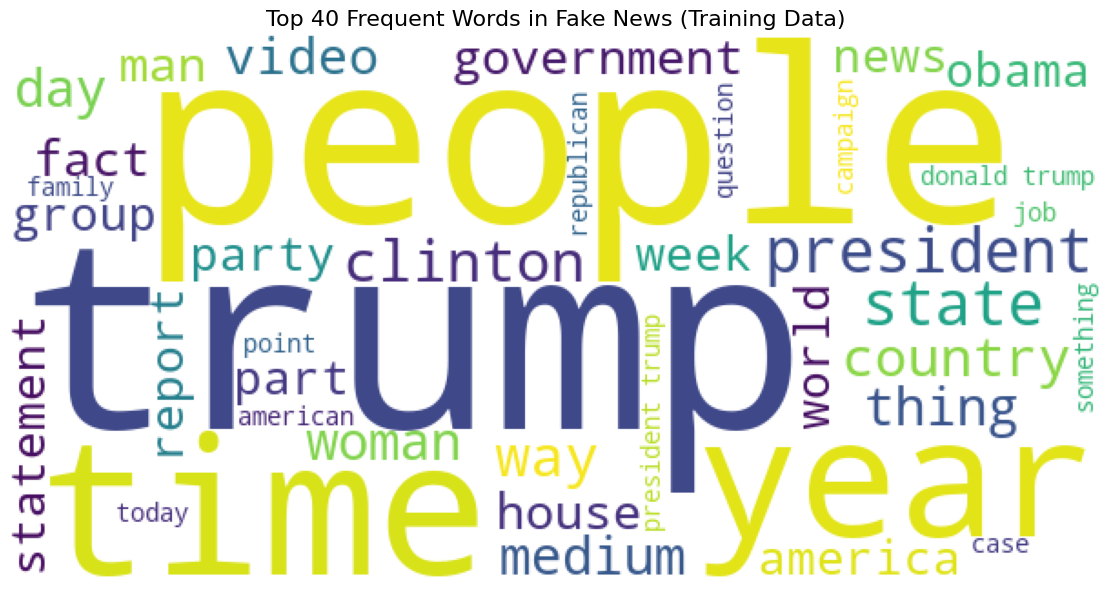

In [275]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = train_df[train_df['news_label'] == 0]
fake_news_text = fake_news['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for Fake News
wordcloud_fake_news = WordCloud(width=600, height=300, max_words=40, background_color='white').generate(fake_news_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake_news)
plt.axis('off')
plt.title('Top 40 Frequent Words in Fake News (Training Data)', fontsize=16)
plt.tight_layout()
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [217]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text_series, ngram_range, top_n):
    # Remove missing rows, ensure text is string
    text_series = text_series.dropna().astype(str)
    # Create a CountVectorizer to extracts n-grams and ignores stop words
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    # Create document-term matrix (Rows = documents, Columns = n-grams, Values = counts)
    X = vectorizer.fit_transform(text_series)
    # Sum across all rows to get total count for each n-gram
    total = X.sum(axis=0)
    # For each word in vocab, build list of (word, count)
    freq = [(word, int(total[0, idx])) for word, idx in vectorizer.vocabulary_.items()]
    # Sort by frequency descending and Return top N most frequent n-grams
    return sorted(freq, key=lambda x: x[1], reverse=True)[:top_n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [213]:
# Handle NaN values in the text data
train_df.isnull().sum()

clean_text                0
lemmatized_text           0
news_label                0
cleaned_text_length       0
lemmatized_text_length    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>


Top 10 Unigrams in True News:
trump: 31494
state: 25438
president: 19205
reuters: 16539
government: 13876
year: 13216
house: 12744
people: 10730
party: 10451
election: 10177


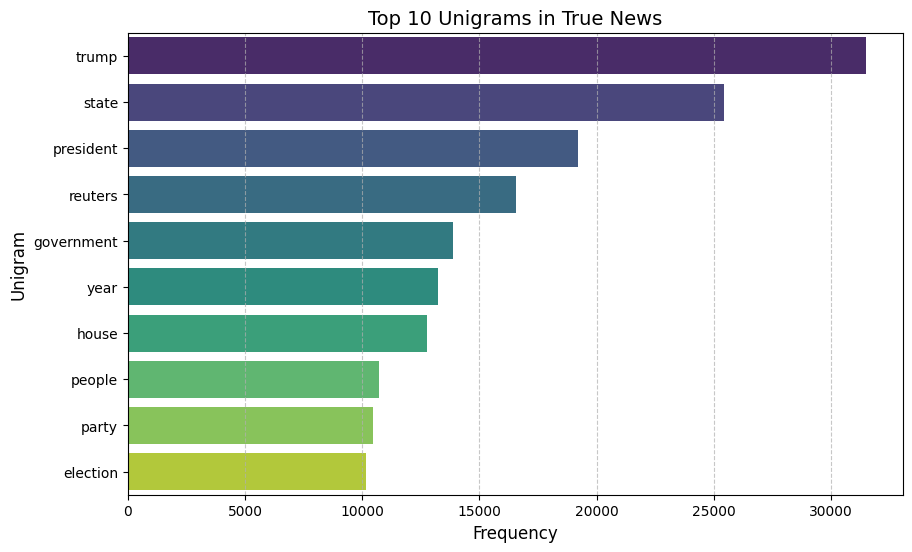

In [290]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_true_unigrams = get_top_ngrams(true_news['lemmatized_text'], ngram_range=(1, 1), top_n=10)

print("\nTop 10 Unigrams in True News (Training Data):")
for word, freq in top_true_unigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_unigrams = [item[0] for item in top_true_unigrams]
true_unigrams_counts = [item[1] for item in top_true_unigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_unigrams_counts, y=true_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in True News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Unigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Bigrams in True News:
donald trump: 2213
president trump: 1972
washington reuters: 1933
president barack: 1929
reuters president: 1853
president donald: 1813
secretary state: 1602
house representative: 1596
state department: 1345
barack obama: 1331


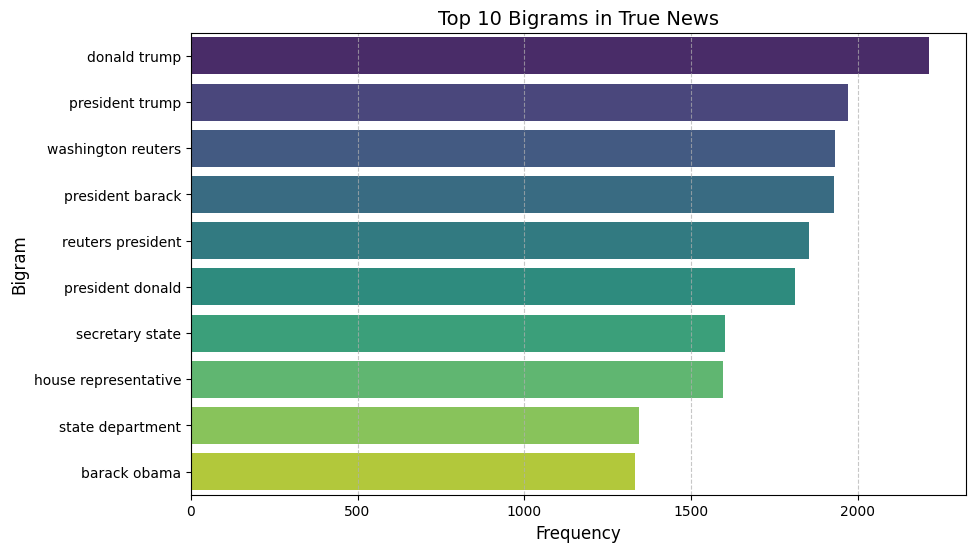

In [292]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_true_bigrams = get_top_ngrams(true_news['lemmatized_text'], ngram_range=(2, 2), top_n=10)

print("\nTop 10 Bigrams in True News (Training Data):")
for word, freq in top_true_bigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_bigrams = [item[0] for item in top_true_bigrams]
true_bigrams_counts = [item[1] for item in top_true_bigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_bigrams_counts, y=true_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in True News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Trigrams in True News:
president barack obama: 1129
president donald trump: 918
reuters president trump: 656
washington reuters president: 564
secretary state rex: 461
state rex tillerson: 439
president vladimir putin: 432
speaker paul ryan: 356
leader mitch mcconnell: 331
chancellor angela merkel: 329


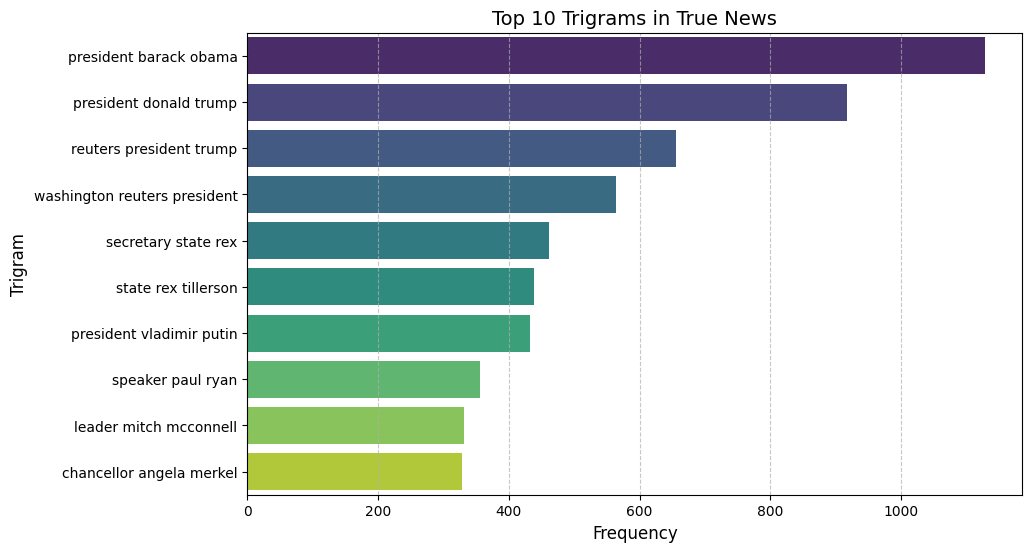

In [294]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_true_trigrams = get_top_ngrams(true_news['lemmatized_text'], ngram_range=(3, 3), top_n=10)

print("\nTop 10 Trigrams in True News (Training Data):")
for word, freq in top_true_trigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_trigrams = [item[0] for item in top_true_trigrams]
true_trigrams_counts = [item[1] for item in top_true_trigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_trigrams_counts, y=true_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in True News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>


Top 10 Unigrams in Fake News:
trump: 47145
president: 18883
people: 18597
state: 15576
clinton: 13083
time: 12488
year: 10588
news: 10322
image: 9867
obama: 8482


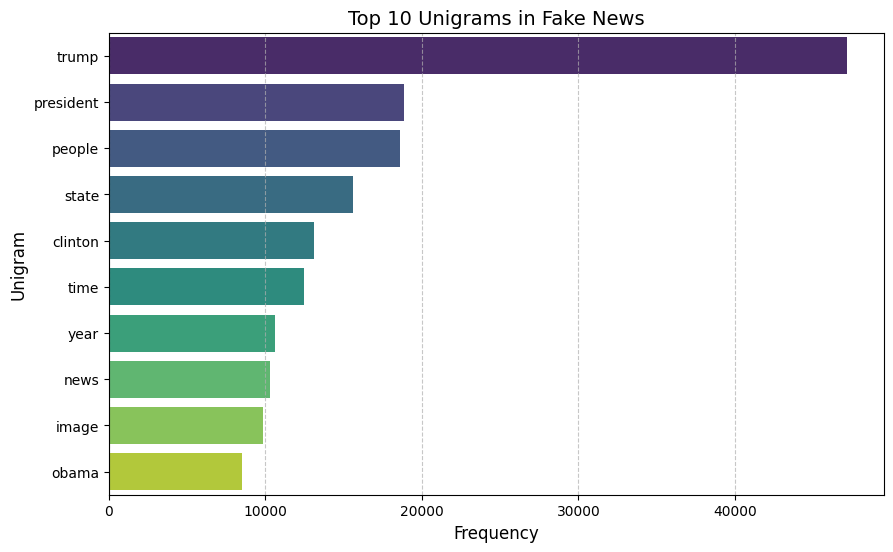

In [296]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_news['lemmatized_text'], ngram_range=(1, 1), top_n=10)

print("\nTop 10 Unigrams in Fake News (Training Data):")
for word, freq in top_fake_unigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_unigrams = [item[0] for item in top_fake_unigrams]
fake_unigrams_counts = [item[1] for item in top_fake_unigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_unigrams_counts, y=fake_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in Fake News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Unigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Bigrams in Fake News:
donald trump: 3767
president trump: 2890
president obama: 1890
trump campaign: 1471
century wire: 1305
trump supporter: 1300
barack obama: 1231
trump realdonaldtrump: 1153
state department: 1136
secretary state: 1127


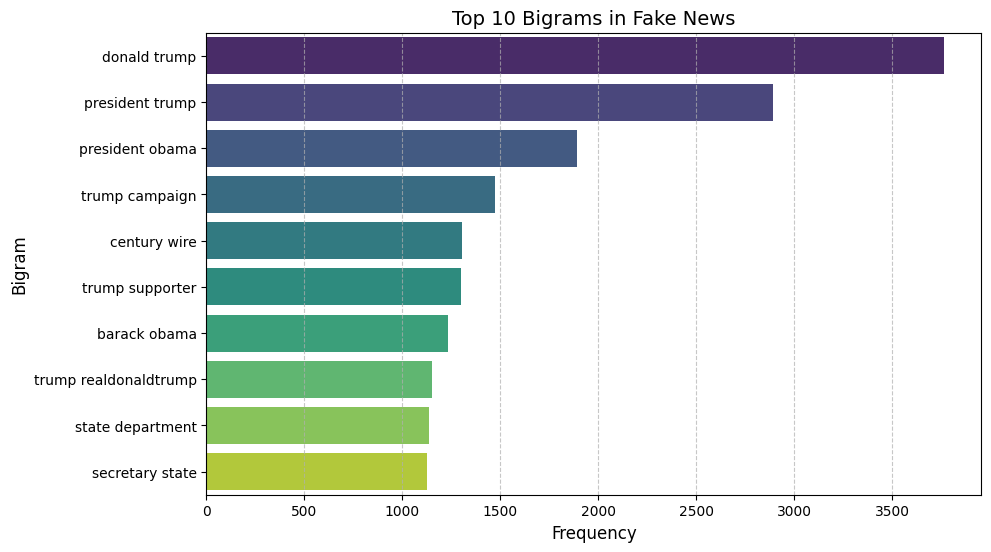

In [298]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_fake_bigrams = get_top_ngrams(fake_news['lemmatized_text'], ngram_range=(2, 2), top_n=10)

print("\nTop 10 Bigrams in Fake News (Training Data):")
for word, freq in top_fake_bigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_bigrams = [item[0] for item in top_fake_bigrams]
fake_bigrams_counts = [item[1] for item in top_fake_bigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_bigrams_counts, y=fake_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in Fake News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>




Top 10 Trigrams in Fake News:
news century wire: 650
donald trump realdonaldtrump: 546
president barack obama: 504
image video capture: 347
president donald trump: 227
department homeland security: 207
secretary state clinton: 193
image chip image: 175
house press secretary: 174
nominee donald trump: 164


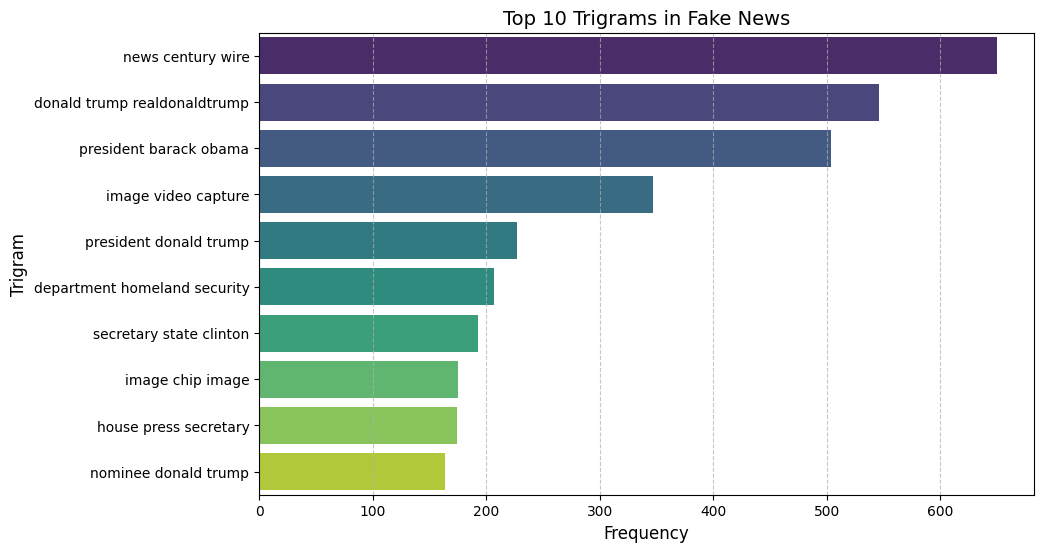

In [300]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_fake_trigrams = get_top_ngrams(fake_news['lemmatized_text'], ngram_range=(3, 3), top_n=10)

print("\nTop 10 Trigrams in Fake News (Training Data):")
for word, freq in top_fake_trigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_trigrams = [item[0] for item in top_fake_trigrams]
fake_trigrams_counts = [item[1] for item in top_fake_trigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_trigrams_counts, y=fake_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in Fake News (Training Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [263]:
# Add a new column to calculate the character length of cleaned news text
val_df['cleaned_text_length'] = val_df['clean_text'].apply(lambda x: len(str(x)))
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemmatized_text_length'] = val_df['lemmatized_text'].apply(lambda x: len(str(x)))

In [265]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13467 entries, 13734 to 15057
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clean_text              13467 non-null  object
 1   lemmatized_text         13467 non-null  object
 2   news_label              13467 non-null  int64 
 3   cleaned_text_length     13467 non-null  int64 
 4   lemmatized_text_length  13467 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 631.3+ KB


In [267]:
val_df.head()

,clean_text,lemmatized_text,news_label,cleaned_text_length,lemmatized_text_length
13734,suicide attack target...,attack target area so...,1,959,405
38781,lying white house pre...,house press secretary...,0,3598,1346
18398,boris johnson gives p...,boris johnson pm brex...,1,3774,1326
18278,india struggles to re...,india border flow cat...,1,2982,1185
5199,in speech trump tries...,trump try washington ...,1,4958,1879


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

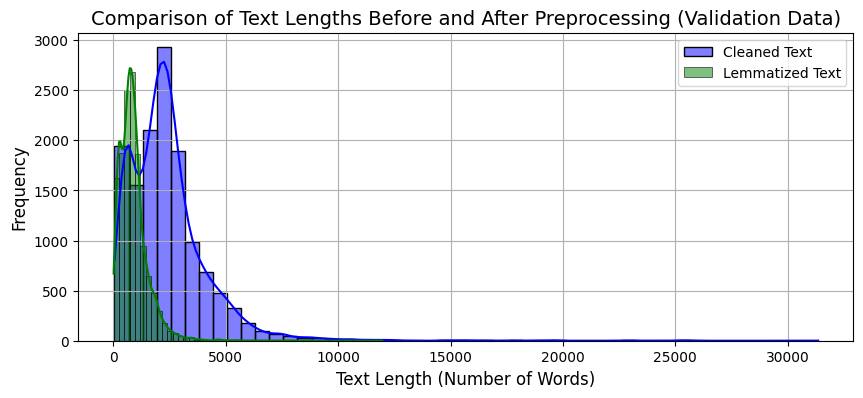

In [269]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,4))

# Add histogram for cleaned news text
sns.histplot(val_df['cleaned_text_length'], color='blue', label='Cleaned Text', kde=True, bins=50, alpha=0.5)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(val_df['lemmatized_text_length'], color='green', label='Lemmatized Text', kde=True, bins=50, alpha=0.5)

# Add labels and legend
plt.title('Comparison of Text Lengths Before and After Preprocessing (Validation Data)', fontsize=14)
plt.xlabel('Text Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

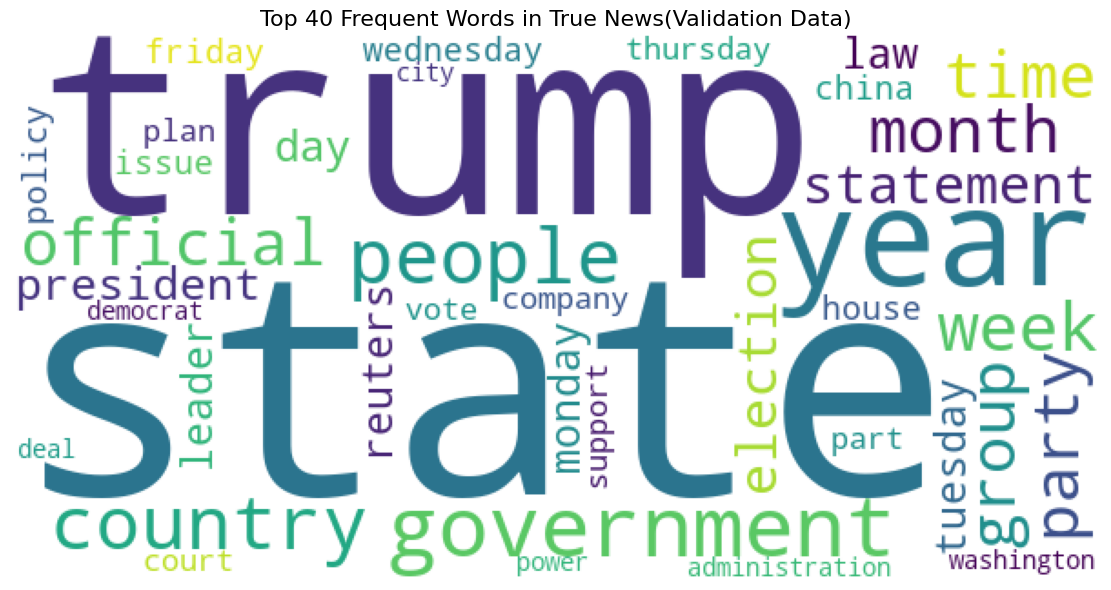

{'state': 1.0, 'trump': 0.9099462365591398, 'year': 0.7955309139784946, 'government': 0.7738575268817204, 'people': 0.6251680107526881, 'country': 0.5848454301075269, 'week': 0.48403897849462363, 'month': 0.4220430107526882, 'official': 0.41851478494623656, 'time': 0.40944220430107525, 'group': 0.39885752688172044, 'party': 0.39381720430107525, 'statement': 0.34711021505376344, 'election': 0.34055779569892475, 'president': 0.32963709677419356, 'day': 0.3131720430107527, 'reuters': 0.29368279569892475, 'law': 0.2918346774193548, 'leader': 0.2857862903225806, 'tuesday': 0.2757056451612903, 'monday': 0.2698252688172043, 'wednesday': 0.26898521505376344, 'house': 0.2642809139784946, 'policy': 0.2619287634408602, 'issue': 0.26176075268817206, 'friday': 0.25386424731182794, 'china': 0.2505040322580645, 'thursday': 0.24176747311827956, 'part': 0.24126344086021506, 'court': 0.23790322580645162, 'company': 0.23269489247311828, 'plan': 0.23000672043010753, 'support': 0.22866263440860216, 'vote':

In [283]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Filter news with label 1 (True News) and convert to string and handle any non-string values
val_true_news = val_df[val_df['news_label'] == 1]
val_true_news_text = val_true_news['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News
wordcloud_val_true_news = WordCloud(width=600, height=300, max_words=40, background_color='white').generate(val_true_news_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_val_true_news)
plt.axis('off')
plt.title('Top 40 Frequent Words in True News (Validation Data)', fontsize=16)
plt.tight_layout()
plt.show()

print(wordcloud_val_true_news.words_)

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

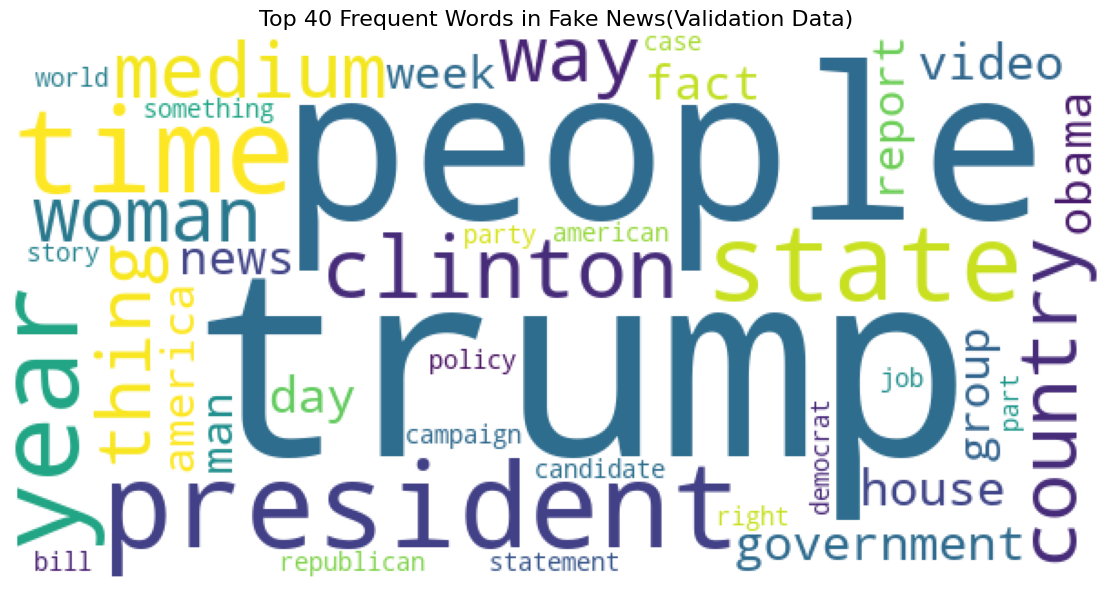

{'trump': 1.0, 'people': 0.625489388007418, 'president': 0.41891613434988667, 'time': 0.4146919431279621, 'year': 0.3744075829383886, 'state': 0.32608695652173914, 'clinton': 0.29878425716051926, 'country': 0.265505872656089, 'way': 0.25355450236966826, 'medium': 0.24644549763033174, 'woman': 0.2409849577580878, 'thing': 0.23366989491036472, 'government': 0.22470636719554915, 'day': 0.22243972800329692, 'video': 0.2219245827323305, 'house': 0.22110035029878425, 'fact': 0.20389449824850608, 'news': 0.19678549350916957, 'obama': 0.19338553472079126, 'man': 0.18236142592211005, 'group': 0.1801978157840511, 'america': 0.17391304347826086, 'week': 0.16742221306408409, 'report': 0.1667010096847311, 'campaign': 0.16010715021636102, 'case': 0.15773748196991552, 'part': 0.1542344941273439, 'american': 0.15237997115186483, 'party': 0.14928909952606634, 'world': 0.14877395425509993, 'story': 0.14558005357510817, 'republican': 0.14516793735833505, 'right': 0.14032557181125077, 'democrat': 0.139810

In [306]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Filter news with label 0 (Fake News) and convert to string and handle any non-string values
val_fake_news = val_df[val_df['news_label'] == 0]
val_fake_news_text = val_fake_news['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News
wordcloud_val_fake_news = WordCloud(width=600, height=300, max_words=40, background_color='white').generate(val_fake_news_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_val_fake_news)
plt.axis('off')
plt.title('Top 40 Frequent Words in Fake News (Validation Data)', fontsize=16)
plt.tight_layout()
plt.show()

print(wordcloud_val_fake_news.words_)

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams
# Already "get_top_ngrams" method defined during training data analysis can be reused for validation data as well

##### 5.3.2 Handle the NaN values

In [288]:
## First handle NaN values in the text data
val_df.isnull().sum()

clean_text                0
lemmatized_text           0
news_label                0
cleaned_text_length       0
lemmatized_text_length    0
dtype: int64

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph


Top 10 Unigrams in True News (Validation Data):
trump: 14176
state: 10910
president: 8283
reuters: 7231
government: 6003
year: 5751
house: 5636
people: 4694
party: 4505
election: 4359


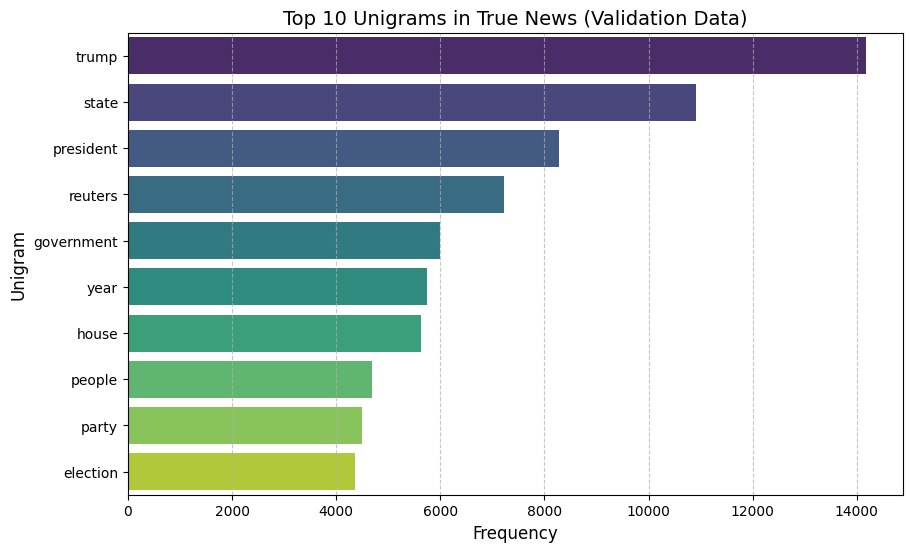

In [308]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top_val_true_unigrams = get_top_ngrams(val_true_news['lemmatized_text'], ngram_range=(1, 1), top_n=10)

print("\nTop 10 Unigrams in True News (Validation Data):")
for word, freq in top_val_true_unigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_val_unigrams = [item[0] for item in top_val_true_unigrams]
true_val_unigrams_counts = [item[1] for item in top_val_true_unigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_val_unigrams_counts, y=true_val_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in True News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Unigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph


Top 10 Bigrams in True News (Validation Data):
donald trump: 1040
president barack: 851
president donald: 848
president trump: 844
washington reuters: 843
reuters president: 783
secretary state: 747
trump campaign: 684
house representative: 681
state department: 633


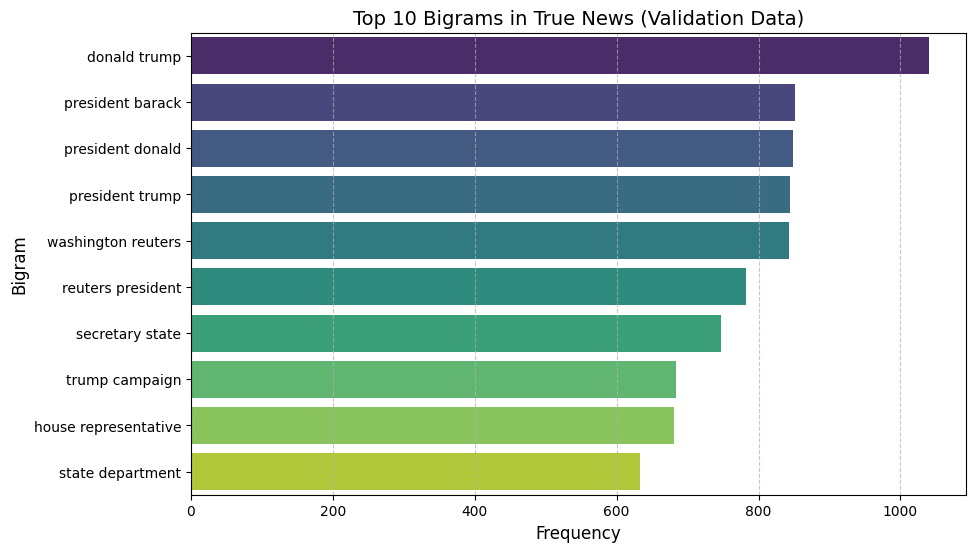

In [312]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

top_val_true_bigrams = get_top_ngrams(val_true_news['lemmatized_text'], ngram_range=(2, 2), top_n=10)

print("\nTop 10 Bigrams in True News (Validation Data):")
for word, freq in top_val_true_bigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_val_bigrams = [item[0] for item in top_val_true_bigrams]
true_val_bigrams_counts = [item[1] for item in top_val_true_bigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_val_bigrams_counts, y=true_val_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in True News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph


Top 10 Trigrams in True News (Validation Data):
president barack obama: 480
president donald trump: 432
reuters president trump: 268
washington reuters president: 240
president vladimir putin: 213
secretary state rex: 211
state rex tillerson: 196
leader mitch mcconnell: 150
speaker paul ryan: 149
majority leader mitch: 139


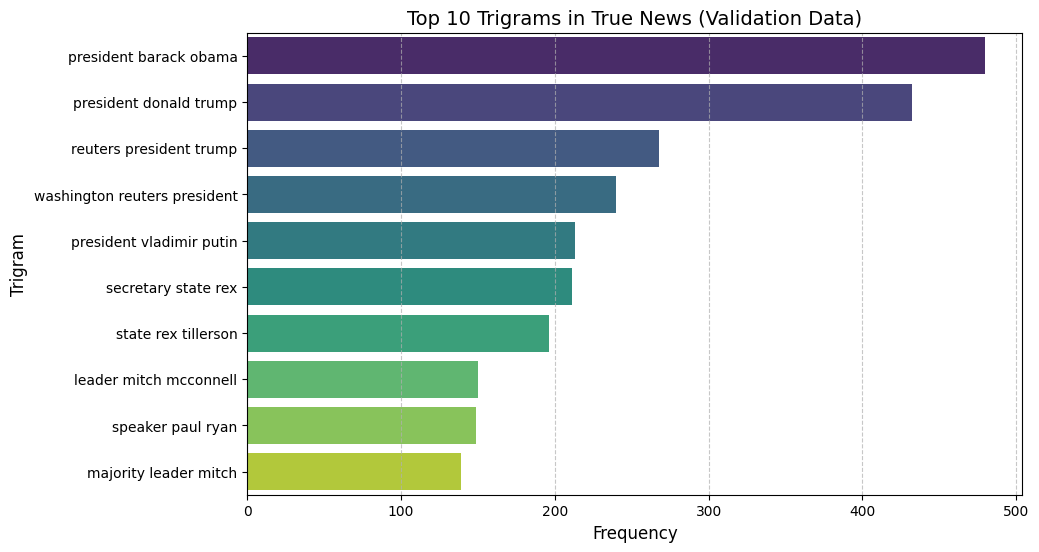

In [314]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_val_true_trigrams = get_top_ngrams(val_true_news['lemmatized_text'], ngram_range=(3, 3), top_n=10)

print("\nTop 10 Trigrams in True News (Validation Data):")
for word, freq in top_val_true_trigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
true_val_trigrams = [item[0] for item in top_val_true_trigrams]
true_val_trigrams_counts = [item[1] for item in top_val_true_trigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=true_val_trigrams_counts, y=true_val_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in True News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph


Top 10 Unigrams in Fake News (Validation Data):
trump: 19741
president: 8089
people: 7761
state: 5842
time: 5242
clinton: 5115
news: 4350
year: 4274
image: 4121
obama: 3547


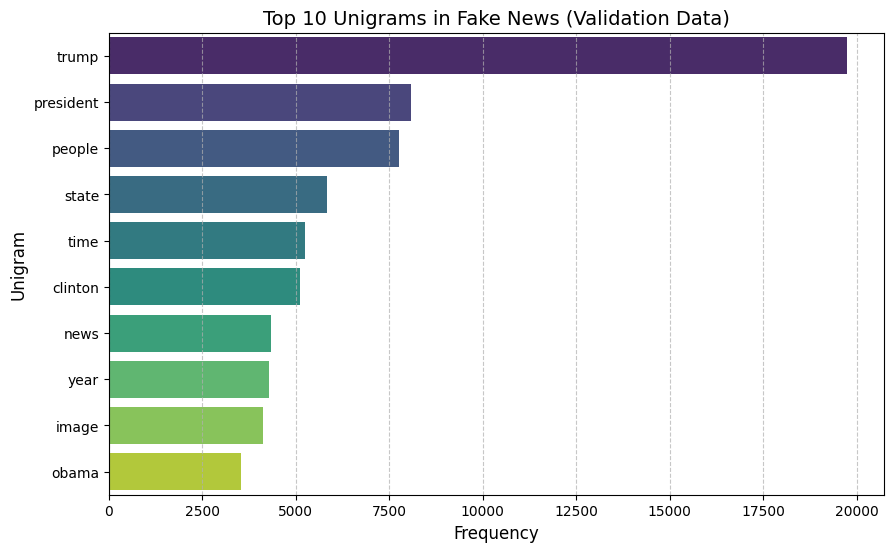

In [316]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_val_fake_unigrams = get_top_ngrams(val_fake_news['lemmatized_text'], ngram_range=(1, 1), top_n=10)

print("\nTop 10 Unigrams in Fake News (Validation Data):")
for word, freq in top_val_fake_unigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_val_unigrams = [item[0] for item in top_val_fake_unigrams]
fake_val_unigrams_counts = [item[1] for item in top_val_fake_unigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_val_unigrams_counts, y=fake_val_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in Fake News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Unigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph


Top 10 Bigrams in Fake News (Validation Data):
donald trump: 1487
president trump: 1242
president obama: 724
century wire: 579
trump supporter: 579
trump campaign: 551
barack obama: 520
york time: 456
law enforcement: 449
secretary state: 448


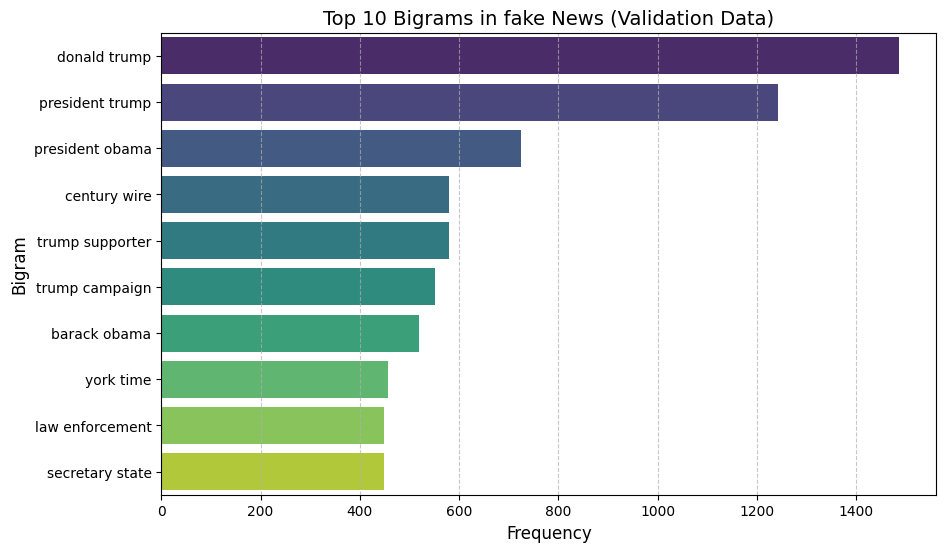

In [318]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

top_val_fake_bigrams = get_top_ngrams(val_fake_news['lemmatized_text'], ngram_range=(2, 2), top_n=10)

print("\nTop 10 Bigrams in Fake News (Validation Data):")
for word, freq in top_val_fake_bigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_val_bigrams = [item[0] for item in top_val_fake_bigrams]
fake_val_bigrams_counts = [item[1] for item in top_val_fake_bigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_val_bigrams_counts, y=fake_val_bigrams, palette='viridis')
plt.title('Top 10 Bigrams in fake News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph


Top 10 Trigrams in Fake News (Validation Data):
news century wire: 283
president barack obama: 234
donald trump realdonaldtrump: 192
image video capture: 189
president donald trump: 89
department homeland security: 87
fbi director james: 84
image chip image: 81
speaker paul ryan: 74
law enforcement officer: 72


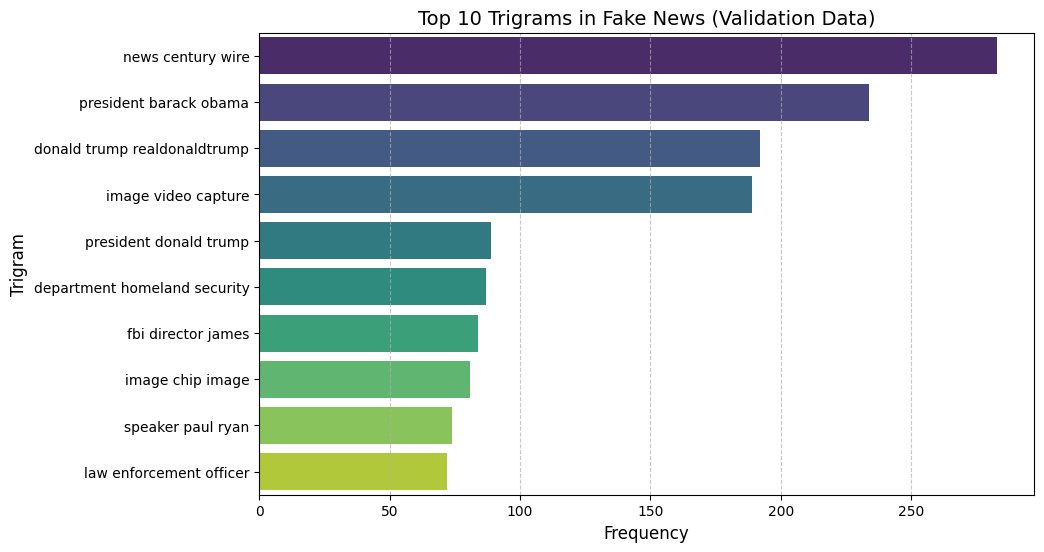

In [320]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

top_val_fake_trigrams = get_top_ngrams(val_fake_news['lemmatized_text'], ngram_range=(3, 3), top_n=10)

print("\nTop 10 Trigrams in Fake News (Validation Data):")
for word, freq in top_val_fake_trigrams:
    print(f"{word}: {freq}")

# Prepare data for plot
fake_val_trigrams = [item[0] for item in top_val_fake_trigrams]
fake_val_trigrams_counts = [item[1] for item in top_val_fake_trigrams]

# Plot bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_val_trigrams_counts, y=fake_val_trigrams, palette='viridis')
plt.title('Top 10 Trigrams in Fake News (Validation Data)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [322]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.5% 91.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.0% 148.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.3% 204.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.9% 264.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.1% 316.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.3% 370.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.4% 422.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.9% 479.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.3% 537.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.7% 593.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.3% 653.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.4% 722.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.2% 800.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.4% 854.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.5% 906.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.2% 951.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.5% 1006.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.7% 1076.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.9% 1145.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.6% 1223.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.3% 1286.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.0% 1346.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.8% 1425.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.5% 1488.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.5% 1555.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 97.8% 1626.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [324]:
print("\nSample vector for 'cat':")
print(word2vec_model['cat']) 


Sample vector for 'cat':
[ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406  0.08300781
  0.04980469 -0.00952148  0.22070312 -0.12597656  0.08056641 -0.5859375
 -0.00445557 -0.296875   -0.01312256 -0.08349609  0.05053711  0.15136719
 -0.44921875 -0.0135498   0.21484375 -0.14746094  0.22460938 -0.125
 -0.09716797  0.24902344 -0.2890625   0.36523438  0.41210938 -0.0859375
 -0.07861328 -0.19726562 -0.09082031 -0.14160156 -0.10253906  0.13085938
 -0.00346375  0.07226562  0.04418945  0.34570312  0.07470703 -0.11230469
  0.06738281  0.11230469  0.01977539 -0.12353516  0.20996094 -0.07226562
 -0.02783203  0.05541992 -0.33398438  0.08544922  0.34375     0.13964844
  0.04931641 -0.13476562  0.16308594 -0.37304688  0.39648438  0.10693359
  0.22167969  0.21289062 -0.08984375  0.20703125  0.08935547 -0.08251953
  0.05957031  0.10205078 -0.19238281 -0.09082031  0.4921875   0.03955078
 -0.07080078 -0.0019989  -0.23046875  0.25585938  0.08984375 -0.10644531
  0.00105286 -0.05883789  0.0510

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [328]:
# convert document words to vector (vector_size 300 as model used word2vec-google-news-300)
def get_word2vec(text, model, vector_size=300):
    words = text.split()
    valid_vectors = [model[word] for word in words if word in model]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)

## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
X_train = train_df['lemmatized_text'].astype(str)
X_test = val_df['lemmatized_text'].astype(str)

X_train_vector = np.vstack(X_train.apply(lambda x: get_word2vec(x, word2vec_model)))
X_test_vector = np.vstack(X_test.apply(lambda x: get_word2vec(x, word2vec_model)))

## Extract the target variable for the training data and validation data
y_train = train_df['news_label'].values
y_test = val_df['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [344]:
## Initialise Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
lr_model.fit(X_train_vector, y_train)

## Predict on validation data
lr_y_pred = lr_model.predict(X_test_vector)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [346]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

# Print results
print(f"Accuracy : {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall   : {lr_recall:.2f}")
print(f"F1-Score : {lr_f1:.2f}")

Accuracy : 0.93
Precision: 0.93
Recall   : 0.93
F1-Score : 0.93


In [348]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, lr_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.93      0.93      0.93      6477

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [350]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train_vector, y_train)

## Predict on validation data
dt_y_pred = dt_model.predict(X_test_vector)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [352]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

# Print results
print(f"Accuracy : {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall   : {dt_recall:.2f}")
print(f"F1-Score : {dt_f1:.2f}")

Accuracy : 0.85
Precision: 0.86
Recall   : 0.82
F1-Score : 0.84


In [354]:
# Classification Report
print("\n Decision Tree Model Classification Report:\n", classification_report(y_test, dt_y_pred))


 Decision Tree Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6990
           1       0.86      0.82      0.84      6477

    accuracy                           0.85     13467
   macro avg       0.85      0.85      0.85     13467
weighted avg       0.85      0.85      0.85     13467



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [356]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train_vector, y_train)

## Predict on validation data
rf_y_pred = rf_model.predict(X_test_vector)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [357]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# Print results
print(f"Accuracy : {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall   : {rf_recall:.2f}")
print(f"F1-Score : {rf_f1:.2f}")

Accuracy : 0.93
Precision: 0.93
Recall   : 0.91
F1-Score : 0.92


In [358]:
# Classification Report
print("\n Random Forest Model Classification Report:\n", classification_report(y_test, rf_y_pred))


 Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.93      0.91      0.92      6477

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

### Logistic Regression with Word2Vec is the Best Classifier compare to **Decision Tree** and **Random Forest** models  
### Logistic Regression Achieved:
- *Accuracy*: 93%
- *Precision*: 93%
- *Recall*: 93%
- *F1-Score*: 93%
(for both classes i.e. True News and False News prediction)

### Model Comparison

### Logistic Regression (with Word 2Vec)
Logistic Regression Model providing better result than compare to  Decision Tree and Random Forest 
Higher precision, recall, and F1-scores for both classes.